#%pylab
%cd /home/ahaase/pc/Daten/DWBA
from aastylebib import *
import matplotlib.gridspec as gridspec
import fitting
import reflectivity
import pso
data_color = "#A60628"
fit_color = "#348ABD"
third_color = "#467821"

In [2]:
def eval_xrr(p, wls, dat):
    sio2, si, mo, c, s, d_si, d_mo, d_C, b4c, d_b4c= p
    N = 64
    import numpy as np
    shift = 0.0
    sigma = s
    stack = [c,si,b4c,mo]
    capthicknesses = [sio2,si,b4c,mo]
    henkes = ["C",'Si',"B4C",'Mo']
    caphenkes = ["SiO2",'Si','B4C',"Mo"]
    densities = [d_C,d_si,d_b4c,d_mo]
    capdensities = [d_si,d_si,d_b4c,d_mo]
    euv_h = reflectivity.xrr(15.0,
                     wls,
                     stack,
                     henkes,
                     N,
                     None,sigma,
                     "Si", densities,None,0,capthicknesses, caphenkes, capdensities)             
        
    euv = euv_h

    return euv
    
    

In [3]:
def residual_mosi(p, wls, dat):
    import fitting
    sio2, si, mo, c, s, d_si, d_mo, d_C, b4c, d_b4c= p
    N=64
    import numpy as np
    shift = 0.0
    sigma = s
    stack = [c,si,b4c,mo]
    capthicknesses = [sio2,si,b4c,mo]
    henkes = ["C",'Si',"B4C",'Mo']
    caphenkes = ["SiO2",'Si','B4C',"Mo"]
    densities = [d_C,d_si,d_b4c,d_mo]
    capdensities = [d_si,d_si,d_b4c,d_mo]
    euv_h = fitting.residual_spec(15.0,
                          wls,
                          dat,
                          stack,
                          henkes,
                          N,
                          sigma,
                          densities,capthicknesses, caphenkes, capdensities)
    

    euv = euv_h

    xi = np.array(euv)
    return xi

In [4]:
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
wl = np.load("PTB17_wl.npy")
dat = np.load("PTB17_dat.npy")

/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


In [222]:
pc

array([ 3.19439904,  2.42090645,  2.459909  ,  0.81130589,  0.32289642,
        0.88288504,  0.9886541 ,  0.83327468,  1.3081704 ,  0.90863311])

In [223]:
lb = [0.0, #sio2,   2
    0.0, #si,     3
    0.0, #mo,     4
    pc[3], #c,      5
    0.0, #s,      6
    pc[5], #d_si,   7
    pc[6], #d_mo,   8
    pc[7], #d_C,    9
    0.5, #b4c,   10
    pc[9]] #d_B4C      12

In [224]:
ub = [7.0, #sio2,   2
    7.0, #si,     3
    7.0, #mo,     4
    pc[3], #c,      5
    2.0, #s,      6
    pc[5], #d_si,   7
    pc[6], #d_mo,   8
    pc[7], #d_C,    9
    0.5, #b4c,   10
    pc[9]] #N      12

In [225]:
weights = [1.0, #sio2,   2
    1.0, #si,     3
    1.0, #mo,     4
    0.0, #c,      5
    0.1, #s,      6
    0.0, #d_si,   7
    0.0, #d_mo,   8
    0.0, #d_C,    9
    0.0, #b4c,   10
    0.0] #N      12

In [226]:
cols = ['$d_{\\mathrm{SiO}_2\mathrm{(cap)}}$',
    '$d_\\mathrm{Si}$',
    '$d_\\mathrm{Mo}$',
    "$d_\\mathrm{C}$", 
    "$\\sigma$", 
    '$\\rho_\\mathrm{Si}$',
    "$\\rho_\\mathrm{Mo}$",
    "$\\rho_\\mathrm{C}$",
    "$d_{\\mathrm{B}_4\\mathrm{C}}$",
    "$\\rho_{\\mathrm{B}_4\\mathrm{C}}$"]     

In [24]:
schwarm = pso.Schwarm(residual_mosi,100,0.7)
schwarm.initialize(lb,
                       ub,
                       weights)
schwarm.run_dwba((wl, dat),2000, None, None, False,100,500,False,False,None)

1: new global minimum xi = 5.863186e+02
[0.5404742759561456, 3.9813025807327023, 1.0711522923541843, 1.2737973587701945, 0.16286597554049254, 0.828455496226272, 0.5358368001121749, 0.6405721774850881, 0.5574758215295974, 0.9487053969722686]
2: new global minimum xi = 1.306950e+02
[1.6904118003479827, 2.651996931972649, 2.030586021175983, 0.8101634337354413, 0.3453551075054674, 0.8156806425025269, 0.930123315199725, 0.7681551699014695, 1.4481891140837002, 0.9484170732527104]
4: new global minimum xi = 7.474543e+01
[1.1180030821584106, 2.6412616130154554, 2.2159904432707034, 0.90395666097459182, 0.3403674549881246, 0.85006879880579211, 0.82856231761667998, 0.77101772232642163, 1.1866566987216036, 0.85886937926520701]
7: new global minimum xi = 4.083277e+01
[1.4622098112067878, 2.4868611991954399, 2.3459904275916479, 0.90731303689359277, 0.3632832909404401, 0.84222581188193746, 0.90727996472751948, 0.71155363477694933, 1.2553456038589144, 0.91167397318399579]
9: new global minimum xi = 3.

[1.597455400956755,
 2.0790485719054188,
 3.8067417031704163,
 0.15100039115009742,
 0.30627250572969356,
 0.84825147947330648,
 0.96057624309346756,
 0.50411155010904962,
 1.0205452545650495,
 0.77871845654356475]

In [9]:
p = [3.1370025256302454, 1.7417539659005272, 3.1701245506146569, 0.61662820445940092, 0.35339562041416506, 0.82914256336901482, 0.99999914432475856, 0.60699970047101581, 1.510189623363575, 0.6743791286807308]

In [10]:
np.sum(residual_mosi(p, wl, dat))

1.7321599641745578

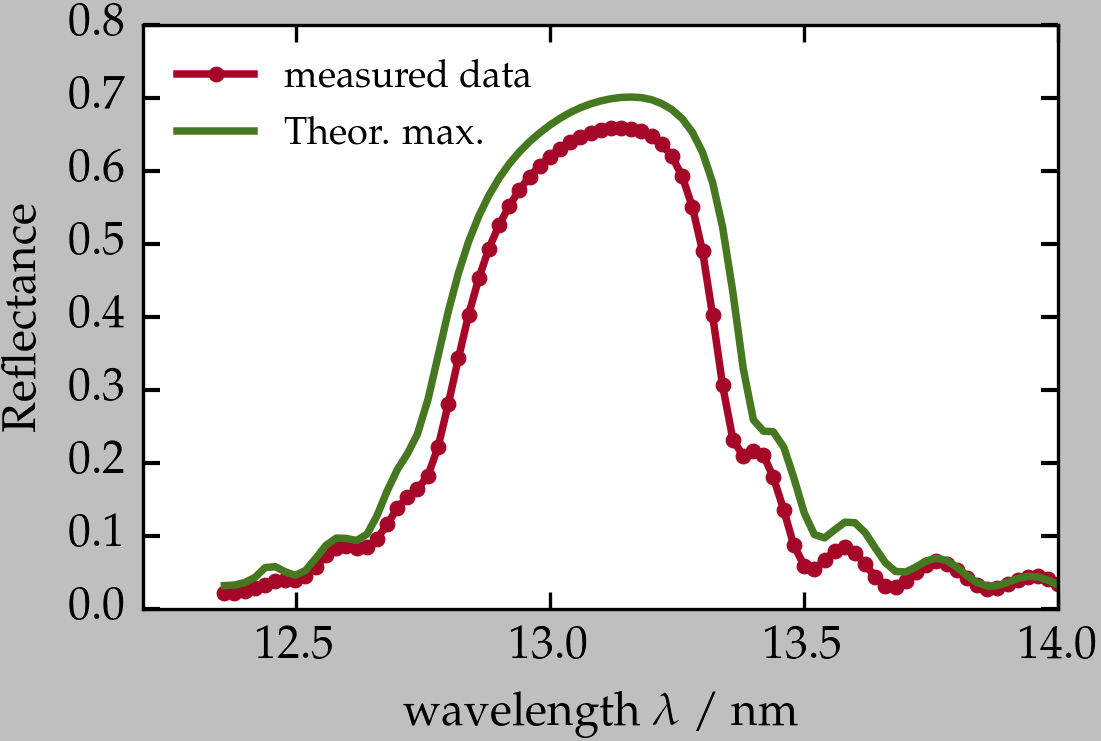

In [172]:
fig = plt.figure(figsize=fig_golden_ratio(2*15/3))
ax = fig.add_subplot(111)

ax.plot(wl, dat, ".-", color=data_color, label="measured data")


ax.legend(loc=2)
ax.set_ylabel("Reflectance")
ax.set_xlabel("wavelength $\\lambda$ / nm")        
ax.set_ylim((0.0,0.8))
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_reflectance_AOI_15.pdf")
ax.plot(wl, eval_xrr(pc,wl,dat), "-", color=fit_color, label="PSO fit")
ax.legend(loc=2)
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_reflectance_AOI_15_fitted.pdf")
fig

In [183]:
wl[argmax(dat)]

13.139830595110697

## MCMC

In [135]:
ndim = len(p)

In [227]:
import corner
import datetime

import matplotlib
matplotlib.use('Tkagg')
from matplotlib import pyplot as plt

#from setup_fit_e4 import *

import emcee

def lnprior(x):
    for i, y in enumerate(x):
        if y < lb[i] or y > ub[i]:
            return -np.inf
        if x[1]+x[2]+x[3]+x[8]>9.0:
            return -np.inf
    return 0.0

# we use e^(-chisqr/2) as our likelihood, with chisqr from the log-intensities.
def lnlike(x):
    return -objective(x)/2

# combined probability
def lnprob(x):
    lp = lnprior(x)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(x)

from IPython.display import clear_output
def mcmc(xopt, theview, nwalkers=100, steps=1000, start=None, filenames="progress", samplename="PS56XX", **kwargs):
    # initialize walkers around our solution from pso, using a tiny gaussian ball around xopt
    # use 500 walkers to get better statistics
    ndim = len(xopt)
    if start is None:
        start_pos = [xopt + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
    else:
        start_pos = start

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, pool=theview, threads=None ,**kwargs)
    #sampler.run_mcmc(start_pos, steps)
    start = datetime.datetime.now()
    for sn, st in enumerate(sampler.sample(start_pos, iterations=steps)):
        if sn % 50== 0:
            print('MCMC: {} steps done in {}'.format(sn+1, datetime.datetime.now()-start))
            print('Total time estimate: {}'.format(steps*(datetime.datetime.now()-start)/(sn+1)))
            print('Total time remaining: {}'.format((steps-sn+1)*(datetime.datetime.now()-start)/(sn+1)))
            plot_chains_collective(sampler, fname=filenames, ndim=ndim, lim=sn)
            np.save("chain_%s_intermediate.npy" % samplename, sampler.chain)
            np.save("lnprob_%s_intermediate.npy" % samplename, sampler.lnprobability)

    # we throw away the first steps as burn-in
    samples = sampler.chain[:, :, :].reshape((-1, ndim))

    return sampler, samples

# some diagnostics
def plot_chains(sampler, fname=None, ndim=ndim, lim=1000):
    figures = {}
    for k in xrange(ndim):
        figures[cols[k]] = plt.figure()
        plt.title(cols[k])
        for i in xrange(len(sampler.chain)):
            plt.plot(sampler.chain[i,:lim,k], color='k', alpha=0.02)
    if fname is not None:
        for col in figures:
            figures[col].savefig(fname + col + '.png')
            plt.close(figures[col])
        return
    return figures

def plot_chains_collective(sampler, fname=None, ndim=ndim, lim=1000):
    figure = plt.figure(figsize=(18,14))
    ax = []
    for i in xrange(ndim):
        ax.append(figure.add_subplot(4,4,i+1))
    for k in xrange(ndim):
        ax[k].set_title(cols[k])
        for i in xrange(len(sampler.chain)):
            ax[k].plot(sampler.chain[i,:lim,k], color='k', alpha=0.02)
    if fname is not None:
        figure.savefig(fname + '.png')
        plt.close(figure)
        return
    return figures

def objective(p):
    res = residual_mosi(p, *arguments)
    chisq = np.sum(res)
    return chisq

In [228]:
arguments = (wl, dat)

In [235]:
from ipyparallel import Client


# Set up the interface to the ipcluster.
c = Client(profile='main', retries=5)
view = c[:]
lbview = c.load_balanced_view()
def push():
    view.execute("import numpy as np")
    view.execute("import reflectivity")
    view.execute("import helper")
    view.push({"lnlike": lnlike})
    view.push({"lnprior": lnprior})
    view.push({"objective": objective})
    view.push({"cols" : cols})

    view.push({"lnprob": lnprob, 
               "residual_mosi" : residual_mosi, 
               "lb" : lb, 
               "ub" : ub, 
               "arguments": arguments})
    print len(view)
push()

28


In [237]:
%cd /home/ahaase/Dropbox
%pylab
walker = 80*4
iterations = 2000


start = np.zeros((walker,len(lb)))
for i in xrange(walker):
    while lnprior(start[i,:]) == -np.inf:
        for j in xrange(len(lb)):
            start[i,j] = random.uniform(lb[j],ub[j])

push()
sampler, samples = mcmc(pc, lbview, walker, iterations, start, samplename="PTB17")
plot_chains_collective(sampler, fname=name+'_EUV', ndim=start.shape[-1], lim=iterations)

name='PTB17_fix'
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
np.save("lnprobability_%s_EUV.npy" % name,sampler.lnprobability)
np.save("chain_%s_EUV.npy" % name,sampler.chain)
np.save("acceptance_fraction_%s_EUV.npy" % name,sampler.acceptance_fraction)

/home/ahaase/Dropbox
Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
28
MCMC: 1 steps done in 0:00:06.211483
Total time estimate: 3:27:04.740000
Total time remaining: 3:27:12.210999
MCMC: 51 steps done in 0:01:50.617577
Total time estimate: 1:12:17.979411
Total time remaining: 1:10:31.708785
MCMC: 101 steps done in 0:03:47.662944
Total time estimate: 1:15:08.186534
Total time remaining: 1:11:25.032543
MCMC: 151 steps done in 0:05:41.607836
Total time estimate: 1:15:24.610754
Total time remaining: 1:09:47.527817
MCMC: 201 steps done in 0:07:35.111043
Total time estimate: 1:15:28.475223
Total time remaining: 1:07:57.895299
MCMC: 251 steps done in 0:09:28.715236
Total time estimate: 1:15:31.601545
Total time remaining: 1:06:07.420139
MCMC: 301 steps done in 0:11:21.808945
Total time estimate: 1:15:30.293401
Total time remaining: 1:04:13.016589
MCMC: 351 steps done in 0:13:16.720981
Total time estimate: 1:15:39.724193
Total time remaining: 1:02:

In [238]:
name = "PTB17_fix"
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
np.save("lnprobability_%s_EUV.npy" % name,sampler.lnprobability)
np.save("chain_%s_EUV.npy" % name,sampler.chain)
np.save("acceptance_fraction_%s_EUV.npy" % name,sampler.acceptance_fraction)

/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


In [239]:
%cd /home/ahaase/Dropbox/PTB/Dissertation/thesis/material/
name = "PTB17_fix"
lnprobability =  np.load("lnprobability_%s_EUV.npy" % name)
chain = np.load("chain_%s_EUV.npy" % name)


/home/ahaase/Dropbox/PTB/Dissertation/thesis/material


In [240]:
chain = chain[:,700:,:].reshape((-1,10))

In [241]:
idx = np.nanargmax(lnprobability[:,700:])
pc = chain[idx, :]

In [242]:
objective(pc)

1.7402187708312307

In [243]:
pc

array([ 3.8694797 ,  2.75035015,  2.94614313,  0.81130589,  0.54010112,
        0.88288504,  0.9886541 ,  0.83327468,  0.5       ,  0.90863311])

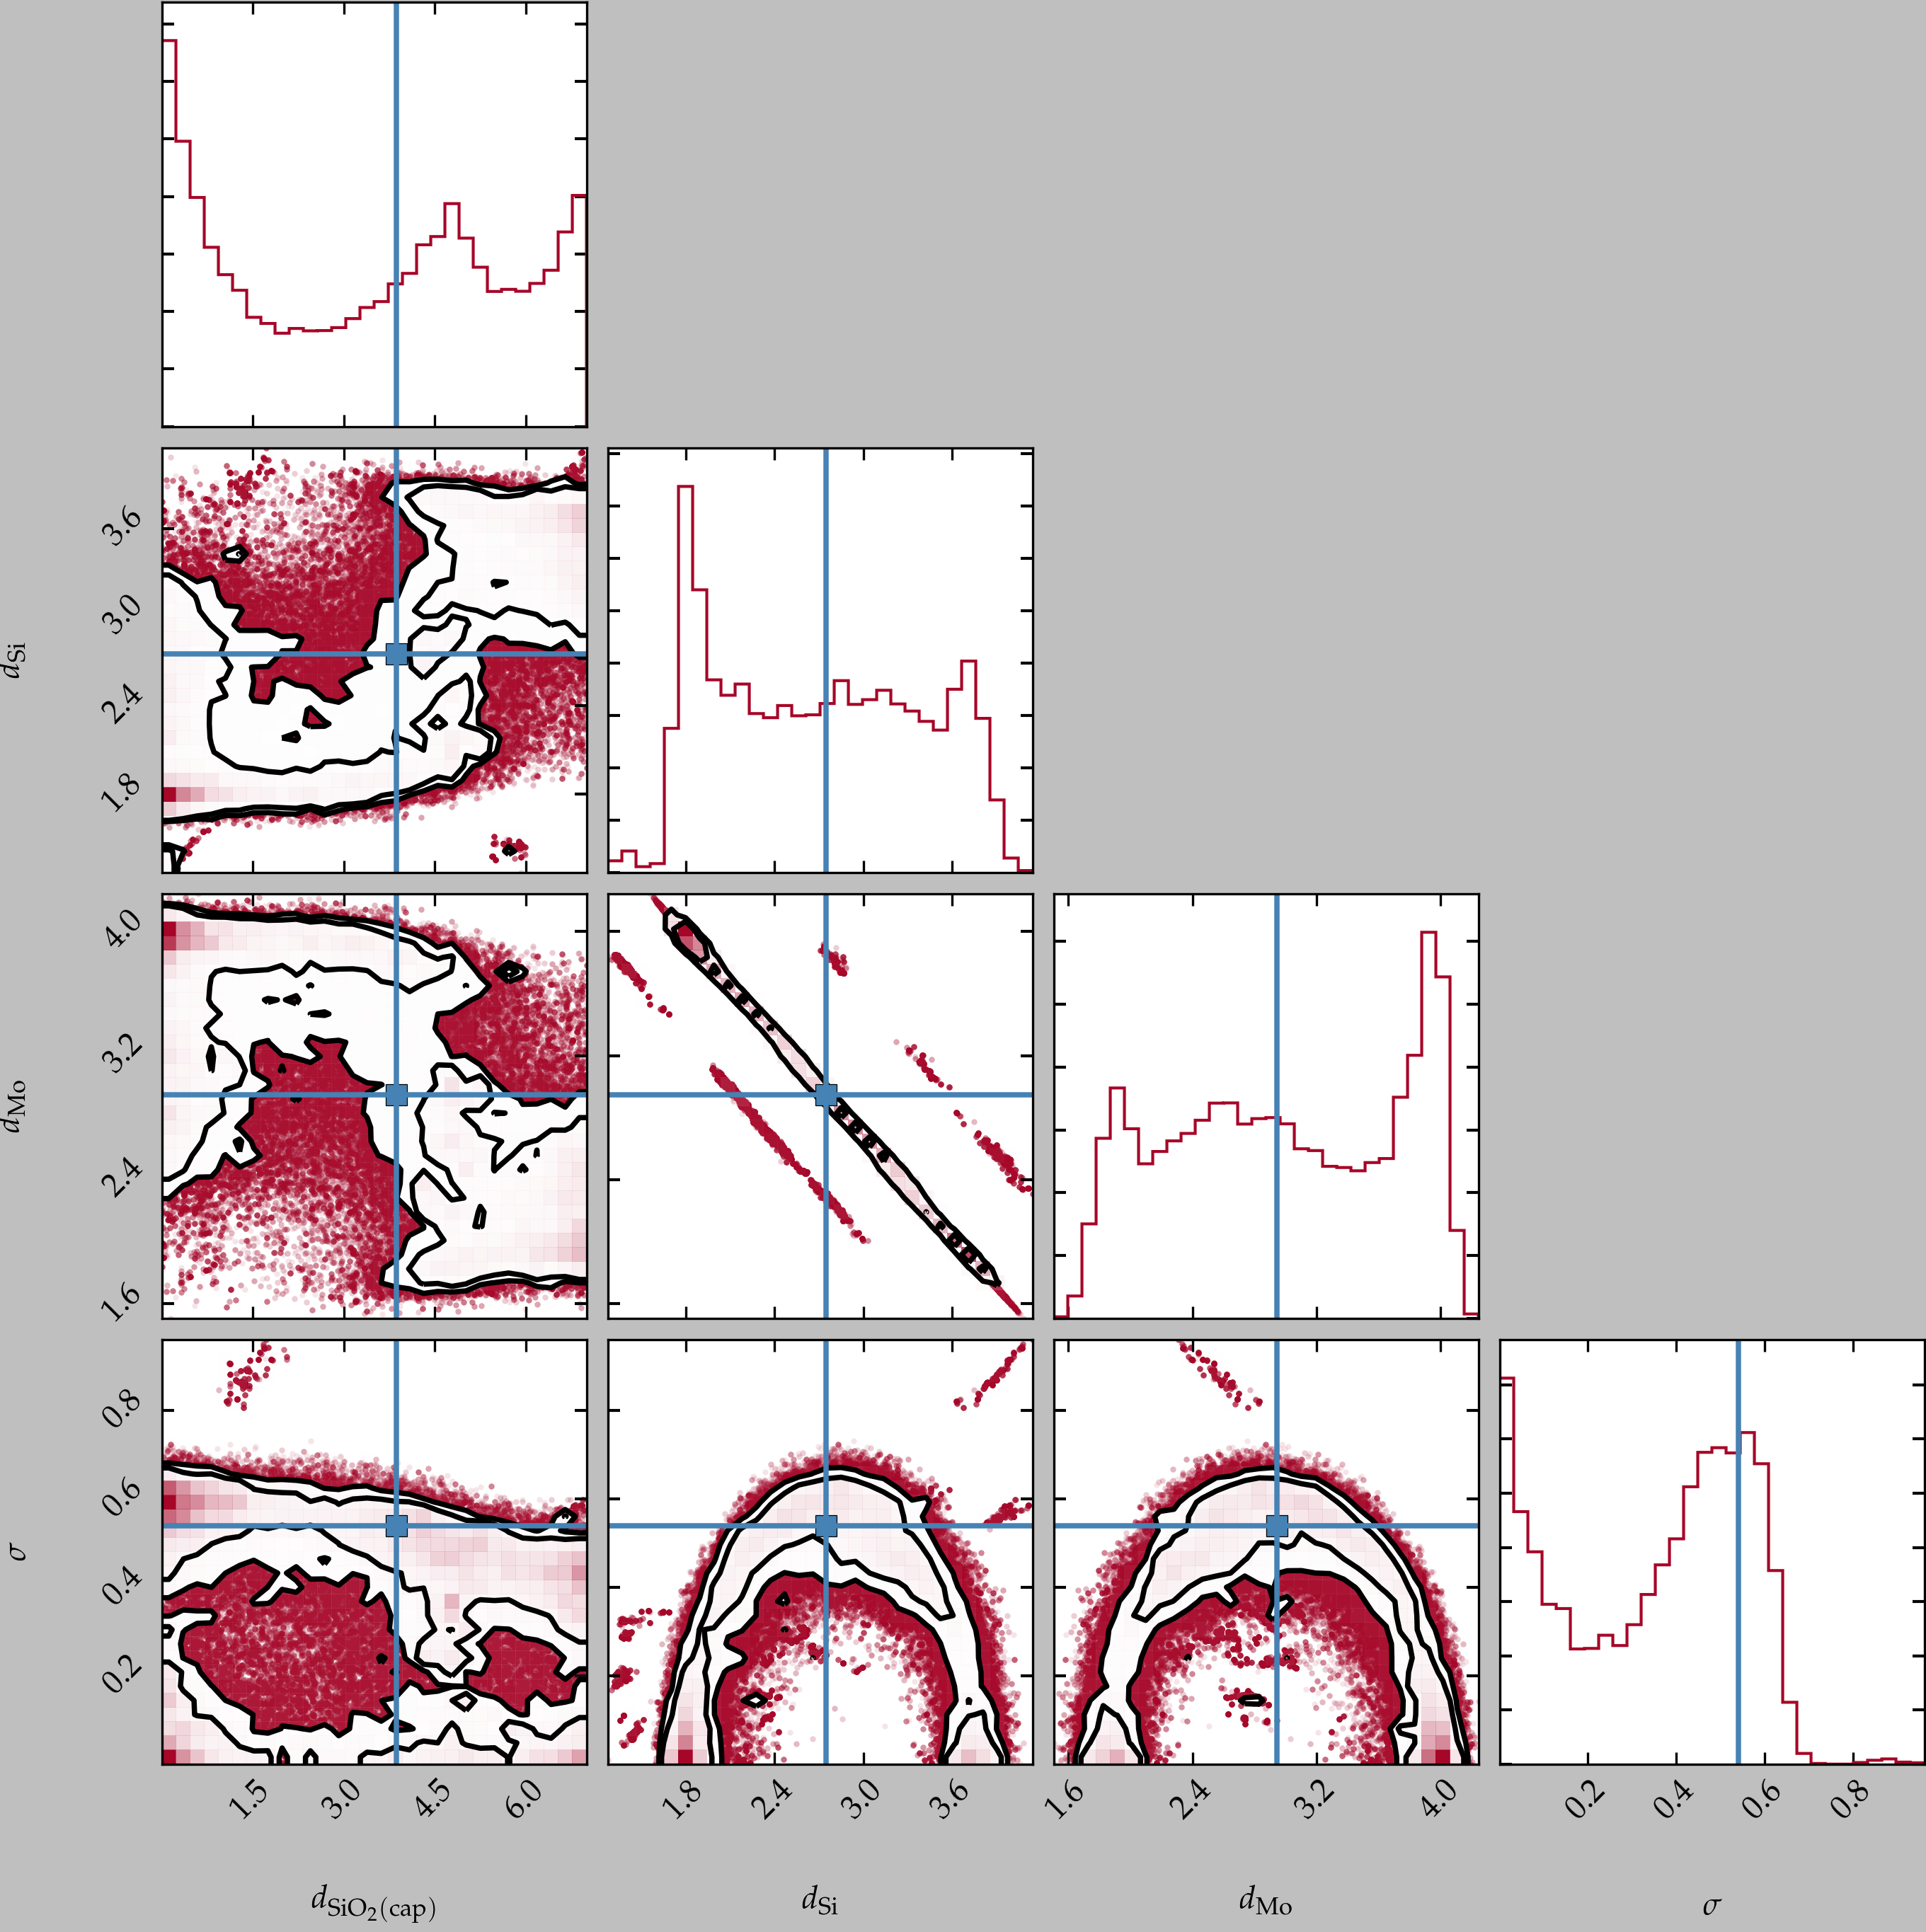

In [244]:
fig = corner.corner(chain[:,[0,1,2,4]], bins=30,levels=[1 - np.exp(-(1/1)**2/2),1 - np.exp(-(2/1)**2/2)],color='#A60628',
              contour_kwargs={'colors':'black'}, truths=pc[[0,1,2,4]], labels=array(cols)[[0,1,2,4]], figsize=(3,3))
fig

In [166]:
array(cols)[[0,1,2,4]]

array(['$d_{\\mathrm{SiO}_2\\mathrm{(cap)}}$', '$d_\\mathrm{Si}$',
       '$d_\\mathrm{Mo}$', '$\\sigma$'], 
      dtype='|S34')

In [46]:
fig_golden_ratio(15.0)

(5.905511811023622, 3.6498836903730667)

In [93]:
p = pc

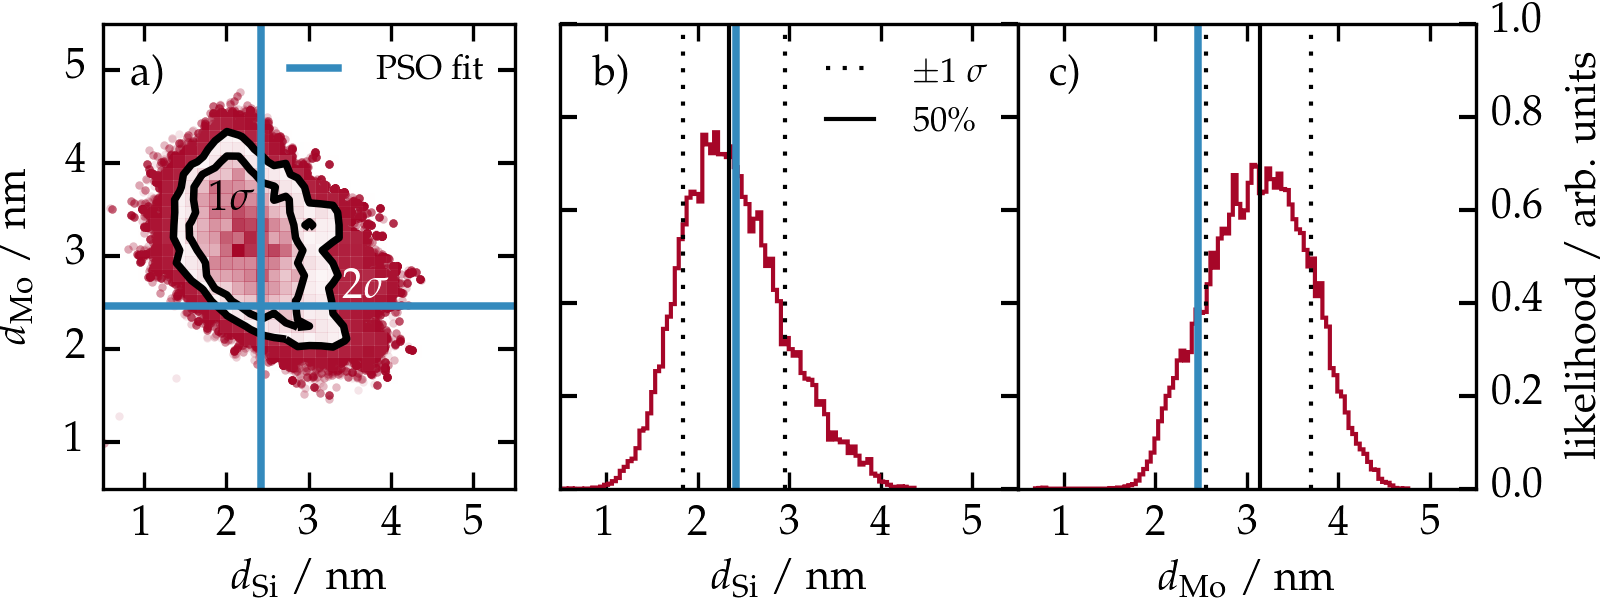

In [110]:
fig = plt.figure(figsize=(5.906,2))
gs = gridspec.GridSpec(1,30)
gs.update(wspace=0.0)
ax = fig.add_subplot(gs[0,:9])
ax2 = fig.add_subplot(gs[0,10:20])
ax3 = fig.add_subplot(gs[0,20:])
corner.hist2d(chain[:,1],
              chain[:,2],
              bins=30,
              levels=[1 - np.exp(-(1/1)**2/2),1 - np.exp(-(2/1)**2/2)],
              ax=ax,
              color='#A60628',
              contour_kwargs={'colors':('black','black')})
ax.set_ylim((0.5,5.5))
ax.set_xlim((0.5,5.5))
ax.hlines(p[2],0.0,6.0, color='#348ABD', linestyle="-", label="PSO fit")
ax.vlines(p[1],0.0,6.0, color='#348ABD', linestyle="-")

ax.text(1.8,3.5,"$1\\sigma$")
ax.text(3.4,2.56,"$2\\sigma$", color='w')
ax.set_ylabel("$d_\\mathrm{Mo}$ / nm")
ax.set_xlabel("$d_\\mathrm{Si}$ / nm")
ax.text(0.07,0.93,"a)",transform=ax.transAxes,verticalalignment='top')
ax.legend(loc=1)

#hist, val = np.histogram(chain[:,1], 100)
ax2.hist(chain[:,1], 100, histtype='step', normed=True, color=data_color)
ax2.set_ylim((0.0,1.0))
ax2.vlines(p[1],0.0,ax2.get_ylim()[1], color='#348ABD', linestyle="-")
l,u,c = np.percentile(chain[:,1],(50-34.1,50+34.1,50.0))
ax2.vlines(l,0.0,ax2.get_ylim()[1], color='black', linestyle="dotted", lw=1)
ax2.vlines(u,0.0,ax2.get_ylim()[1], color='black', linestyle="dotted", lw=1, label="$\\pm 1$ $\\sigma$")
ax2.vlines(c,0.0,ax2.get_ylim()[1], color='black', linestyle="-", lw=1, label="$50\%$")
ax2.set_xlim((0.5,5.5))
ax2.set_yticklabels(())
ax2.set_xlabel("$d_\\mathrm{Si}$ / nm")
ax2.text(0.07,0.93,"b)",transform=ax2.transAxes,verticalalignment='top')
ax2.legend(loc=1)


ax3.hist(chain[:,2], 100, histtype='step', normed=True, color=data_color)
ax3.set_ylim((0.0,1.0))
ax3.vlines(p[2],0.0,ax3.get_ylim()[1], color='#348ABD', linestyle="-")
l,u,c = np.percentile(chain[:,2],(50-34.1,50+34.1,50.0))
ax3.vlines(l,0.0,ax3.get_ylim()[1], color='black', linestyle="dotted", lw=1)
ax3.vlines(u,0.0,ax3.get_ylim()[1], color='black', linestyle="dotted", lw=1)
ax3.vlines(c,0.0,ax3.get_ylim()[1], color='black', linestyle="-", lw=1)
ax3.set_xlim((0.5,5.5))
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel("likelihood / arb. units", )
ax3.text(0.07,0.93,"c)",transform=ax3.transAxes,verticalalignment='top')
ax3.set_xlabel("$d_\\mathrm{Mo}$ / nm")

fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_MCMC_d_Mo_vs_d_Si.pdf")
fig

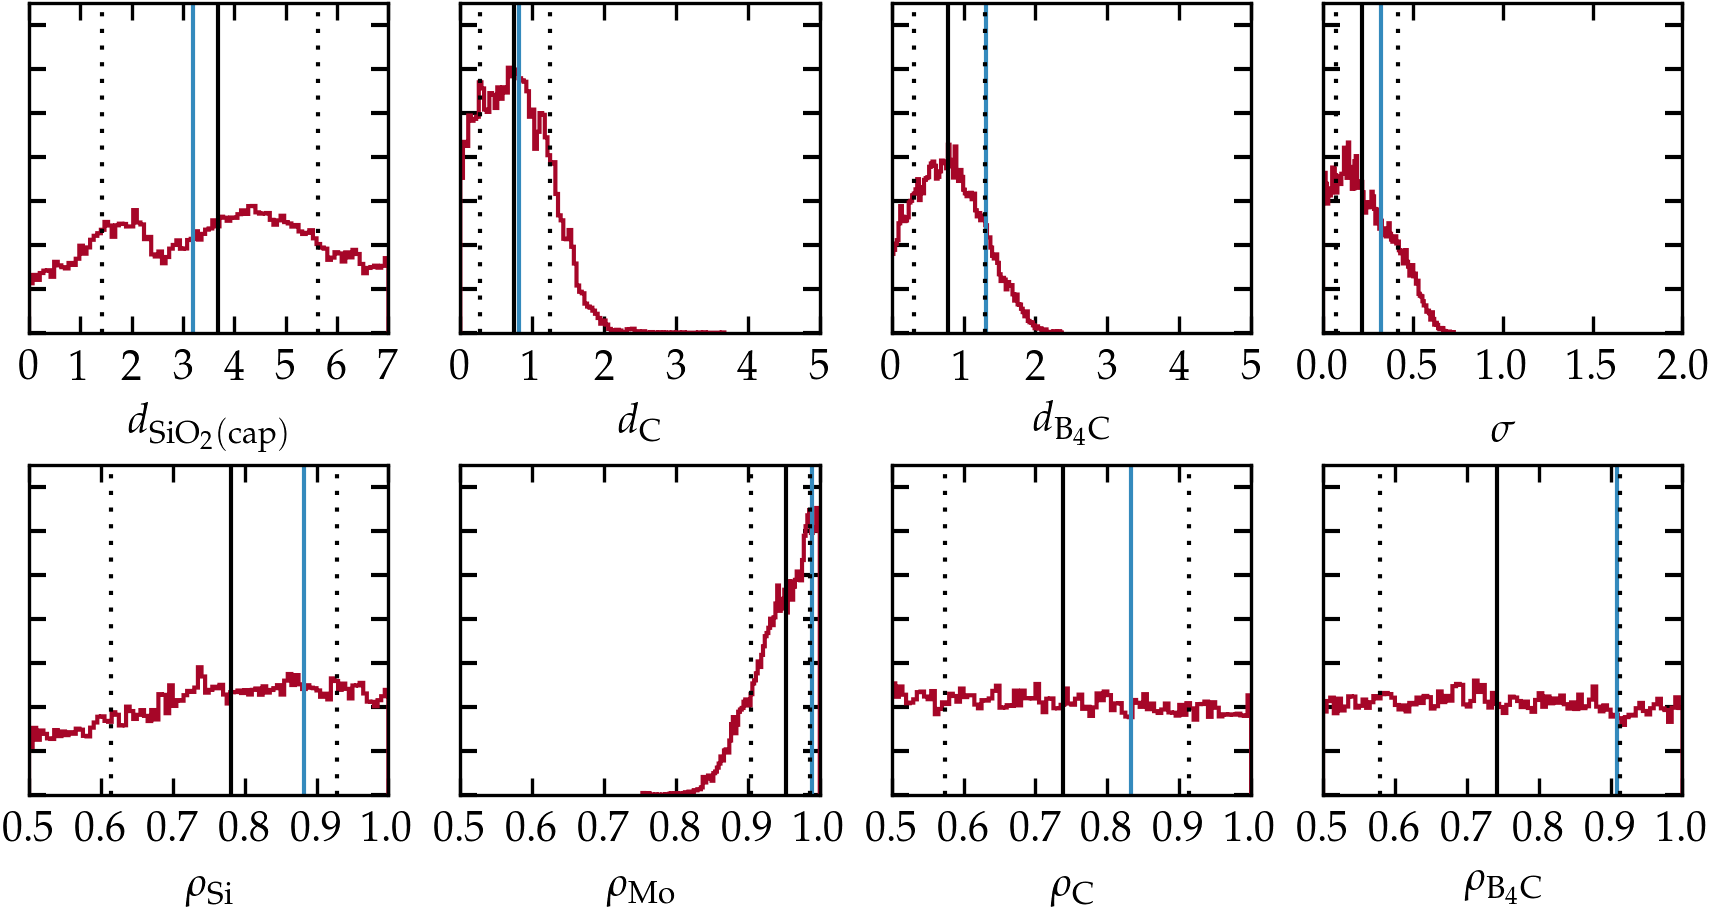

In [130]:
fig = plt.figure(figsize=fig_golden_ratio(14.0))
gs = gridspec.GridSpec(2,4)
gs.update(left=0, right=1.0,wspace=0.2, hspace=0.4)
ax = []
for i in xrange(2):
    for j in xrange(4):
        ax.append(fig.add_subplot(gs[i,j]))
        
ch = [chain[:,0],chain[:,3],chain[:,8],chain[:,4],chain[:,5],chain[:,6],chain[:,7],chain[:,9]]
ls = [cols[0],cols[3],cols[8],cols[4],cols[5],cols[6],cols[7],cols[9]]
ps = [p[0],p[3],p[8],p[4],p[5],p[6],p[7],p[9]]
lbs =[lb[0],lb[3],lb[8],lb[4],lb[5],lb[6],lb[7],lb[9]]
ubs =[ub[0],ub[3],ub[8],ub[4],ub[5],ub[6],ub[7],ub[9]]
        
for i,a in enumerate(ax):
    ax[i].hist(ch[i], 100, histtype='step', normed=False, color=data_color)
    ax[i].set_ylim((0.0,15000))
    ax[i].vlines(ps[i],0.0,ax[i].get_ylim()[1], color='#348ABD', linestyle="-", lw=1)
    l,u,c = np.percentile(ch[i],(50-34.1,50+34.1,50.0))
    ax[i].vlines(l,0.0,ax[i].get_ylim()[1], color='black', linestyle="dotted", lw=1)
    ax[i].vlines(u,0.0,ax[i].get_ylim()[1], color='black', linestyle="dotted", lw=1, label="$\\pm 1$ $\\sigma$")
    ax[i].vlines(c,0.0,ax[i].get_ylim()[1], color='black', linestyle="-", lw=1, label="$50\%$")
    ax[i].set_xlim((lbs[i],ubs[i]))
    ax[i].set_yticklabels(())
    ax[i].set_xlabel(ls[i])
    #ax[i].text(0.07,0.93,"b)",transform=ax[i].transAxes,verticalalignment='top')
fig.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/PTB17_MCMC_other_params.pdf")
fig

In [202]:
l,u,c = np.percentile(chain[:,:],(50-34.1,50+34.1,50.0), axis=0)
l2,u2,c2 = np.percentile(chain[:,:],(50-(34.1+13.6),50+(34.1+13.6),50.0), axis=0)

In [211]:
cols

['$d_{\\mathrm{SiO}_2\\mathrm{(cap)}}$',
 '$d_\\mathrm{Si}$',
 '$d_\\mathrm{Mo}$',
 '$d_\\mathrm{C}$',
 '$\\sigma$',
 '$\\rho_\\mathrm{Si}$',
 '$\\rho_\\mathrm{Mo}$',
 '$\\rho_\\mathrm{C}$',
 '$d_{\\mathrm{B}_4\\mathrm{C}}$',
 '$\\rho_{\\mathrm{B}_4\\mathrm{C}}$']

In [215]:
names = ['$d_\\text{SiO$_2$(cap)}$ / nm &',
'$d_\\text{Si}$ / nm &',
'$d_\\text{Mo}$ / nm &',
'$d_\\text{C}$ / nm &',
'$\\sigma$ / nm &',
'$\\rho_\\text{Si}$ &',
'$\\rho_\\text{Mo}$ &',
'$\\rho_\\text{C}$ &',
'$d_\\text{B$_4$C}$ / nm &',
'$\\rho_\\text{B$_4$C}$ &']

In [210]:
pc

array([ 3.19439904,  2.42090645,  2.459909  ,  0.81130589,  0.32289642,
        0.88288504,  0.9886541 ,  0.83327468,  1.3081704 ,  0.90863311])

In [220]:
for i,p in enumerate(pc):
    print "%s $%.3f({%.3f}/{+%.3f})$ & $%.3f({%.3f}/{+%.3f})$ \\\\" % (names[i], np.round(c[i],3),l[i]-c[i], u[i]-c[i],c[i],l2[i]-c[i], u2[i]-c[i])

$d_\text{SiO$_2$(cap)}$ / nm & $3.677({-2.252}/{+1.944})$ & $3.677({-3.407}/{+3.108})$ \\
$d_\text{Si}$ / nm & $2.338({-0.497}/{+0.616})$ & $2.338({-0.916}/{+1.294})$ \\
$d_\text{Mo}$ / nm & $3.137({-0.587}/{+0.560})$ & $3.137({-1.054}/{+1.016})$ \\
$d_\text{C}$ / nm & $0.744({-0.477}/{+0.510})$ & $0.744({-0.696}/{+0.971})$ \\
$\sigma$ / nm & $0.214({-0.143}/{+0.201})$ & $0.214({-0.204}/{+0.347})$ \\
$\rho_\text{Si}$ & $0.782({-0.167}/{+0.147})$ & $0.782({-0.264}/{+0.208})$ \\
$\rho_\text{Mo}$ & $0.953({-0.048}/{+0.034})$ & $0.953({-0.094}/{+0.045})$ \\
$\rho_\text{C}$ & $0.739({-0.164}/{+0.175})$ & $0.739({-0.228}/{+0.249})$ \\
$d_\text{B$_4$C}$ / nm & $0.782({-0.471}/{+0.511})$ & $0.782({-0.722}/{+0.973})$ \\
$\rho_\text{B$_4$C}$ & $0.741({-0.162}/{+0.172})$ & $0.741({-0.230}/{+0.247})$ \\


In [197]:
u

array([ 5.62131145,  2.95459253,  3.69748698,  1.25435951,  0.41549251,
        0.92862391,  0.98684296,  0.91376819,  1.29333862,  0.91374269])

In [200]:
l,u,c = np.percentile(chain[:,:],(50-(34.1+13.6),50+(34.1+13.6),50.0), axis=0)